# GRU

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import math
import matplotlib.pyplot as plt
import random

# Set seed

In [2]:
random.seed(10)

# Load Data

In [3]:
agg_data_monthly = pd.read_csv("aggregate_data_daily.csv", parse_dates=True)
agg_data_monthly['date'] = pd.to_datetime(agg_data_monthly.date).dt.strftime("%Y-%m")
agg_data_monthly.sort_values(by='date',ascending=False)
agg_data_monthly = agg_data_monthly.groupby(["date"]).mean()
agg_data_monthly.index = pd.DatetimeIndex(agg_data_monthly.index)
df = agg_data_monthly.reset_index()

In [4]:
df1 = df['close']
df1

0     131662.912162
1     134029.758441
2     130201.195084
3     128641.653752
4     124706.381832
          ...      
88    230863.450167
89    241987.177965
90    259750.665171
91    262783.471016
92    256451.490138
Name: close, Length: 93, dtype: float64

In [5]:
df1_max = max(df['close'])
df1_min = min(df['close'])

# Data Preprocessing

In [6]:
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [7]:
training_size=int(len(df1)*0.8)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [8]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

# Train/Test Split

In [9]:
time_step=5
X_train, y_train = create_dataset(train_data, time_step)
X_train2, y_train2 = X_train, y_train
X_test, y_test = create_dataset(test_data, time_step)
X_test2, y_test2 = X_test, y_test

In [10]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [11]:
X_train.shape[1]

5

# Model

In [12]:
# create and fit the GRU network
model = Sequential()
model.add(GRU(64, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.8))  # add a dropout layer with rate 0.8
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.8))  # add a dropout layer with rate 0.8
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17,089
Trainable params: 17,089
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(X_train, y_train, epochs=20, batch_size=64, shuffle=False)

Epoch 1/20
2/2 [==============================] - 2s 9ms/step - loss: 0.0926
Epoch 2/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0848
Epoch 3/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0814
Epoch 4/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0828
Epoch 5/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0676
Epoch 6/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0571
Epoch 7/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0702
Epoch 8/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0626
Epoch 9/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0875
Epoch 10/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0623
Epoch 11/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0748
Epoch 12/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0594
Epoch 13/20
2/2 [==============================] - 0s 4ms/step - loss: 0.

# Prediction

In [15]:
test_predict = model.predict(X_test)

1/1 [==============================] - 1s 503ms/step


In [16]:
print(f'MSE {mean_squared_error(y_test, test_predict)}')
print(f'R2 {r2_score(y_test, test_predict)}')

MSE 0.19514667739243555
R2 -30.78314241035516


In [17]:
test_predict= scaler.inverse_transform(test_predict)
train_predict = model.predict(X_train)
train_predict=scaler.inverse_transform(train_predict)

3/3 [==============================] - 0s 2ms/step


In [18]:
train_predict

array([[141176.36],
       [141308.  ],
       [141594.2 ],
       [140921.  ],
       [140879.12],
       [140366.66],
       [139468.86],
       [138207.78],
       [136900.17],
       [136369.72],
       [137005.5 ],
       [137957.14],
       [139459.  ],
       [141666.1 ],
       [143682.78],
       [145191.75],
       [146160.11],
       [145575.5 ],
       [144435.84],
       [143926.67],
       [144384.19],
       [145076.03],
       [146431.48],
       [148157.23],
       [149573.42],
       [150746.03],
       [151493.16],
       [152165.42],
       [152668.5 ],
       [153086.45],
       [153533.25],
       [154354.33],
       [154117.6 ],
       [153241.92],
       [153449.25],
       [153618.17],
       [153826.38],
       [154516.05],
       [156141.89],
       [157023.94],
       [155246.17],
       [154584.27],
       [154767.  ],
       [154762.61],
       [154588.06],
       [155713.83],
       [157135.1 ],
       [157859.34],
       [158838.4 ],
       [158974.67],


In [19]:
y_test2 = (y_test * (df1_max - df1_min)) + df1_min
y_test2

array([268476.82550784, 271339.46890036, 269766.41264169, 259710.21503216,
       266522.32926365, 256552.02812216, 244766.68692385, 255993.0336101 ,
       237253.67220316, 230863.4501671 , 241987.17796531, 259750.66517148,
       262783.47101631])

In [20]:
print(f'MSE {mean_squared_error(y_test2, test_predict)}')
print(f'R2 {r2_score(y_test2, test_predict)}')
print(f'MAE {math.sqrt(mean_squared_error(y_test2, test_predict))}')

MSE 5062787677.638452
R2 -30.783142729113965
MAE 71153.26891744645


In [21]:
look_back = 5

trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

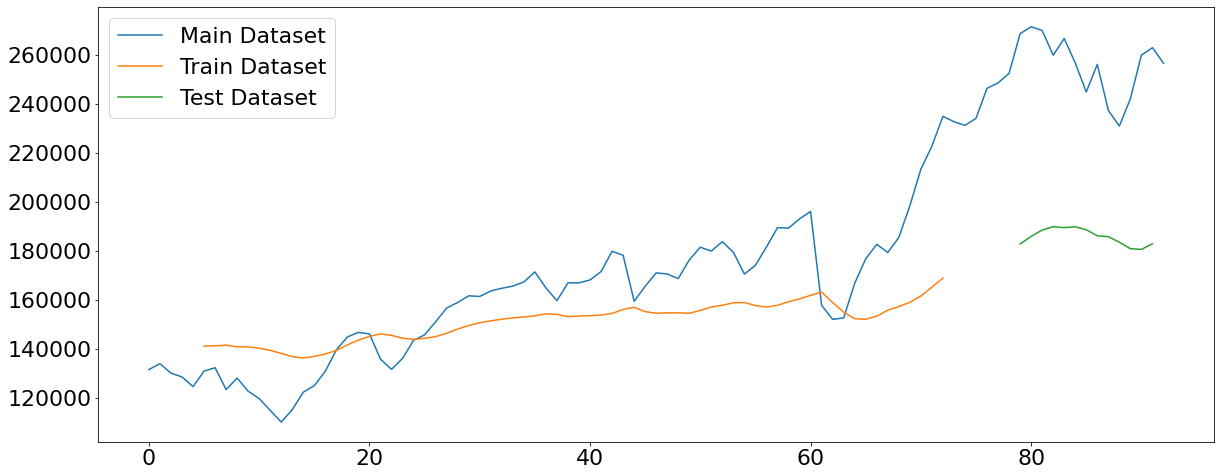

In [22]:
plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 22})
plt.plot(scaler.inverse_transform(df1), label = 'Main Dataset')
plt.plot(trainPredictPlot, label = 'Train Dataset')
plt.plot(testPredictPlot, label = 'Test Dataset')
plt.legend()